#### Bandit problems require a balance between the exploration and exploitation trade-off. Because the problem starts with no prior knowledge of the rewards, it needs to explore (try a lot of slot machines) and then exploit (repeatedly pull the best lever) once it has narrowed down its selections.

Solving the multi bandit problem through this algorithm

![title](capture.png)

- algorithm assumes starting value for all 'd' arms. confidence bound is created in such a way that it includes the actual return value for a particular arm
- any arm is chosen for eg. D1, and if return value is 0, the starting value decreases and the confidence bound increases. 
- in the next iteration

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
file = pd.read_csv("ads.csv")
file.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [14]:
# 1 indicates user clicked on respective ad, and 0 represents user didnt click

In [10]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = file.values[n, ad]
    total_reward = total_reward + reward
total_reward

1222

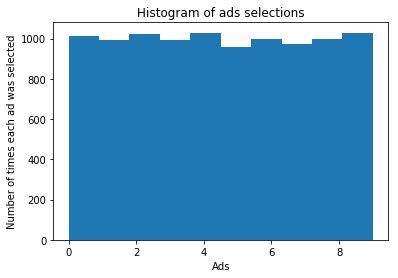

In [7]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

![title](ucb.png)

In [24]:
#Implementation of UCB following the above steps
import math

ads_selected = []

#Step 1
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
#Step 2
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if(number_of_selections[i] > 0):
            avg_reward = sum_of_rewards[i]/number_of_selections[i]
            delta_i = math.sqrt(3/2 * (math.log(n+1)/number_of_selections[i]))
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400 #(10 to the power of 400)
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
            
#Step 3
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = file.values[n, ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [21]:
total_reward #double than that of the total reward of random selection


2178

In [22]:
ads_selected

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 7,
 0,
 0,
 6,
 8,
 4,
 0,
 7,
 1,
 1,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 0,
 0,
 7,
 0,
 4,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 7,
 0,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 0,
 7,
 7,
 4,
 7,
 7,
 7,
 1,
 6,
 8,
 0,
 4,
 4,
 2,
 3,
 5,
 9,
 4,
 7,
 0,
 7,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 8,
 4,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 0,
 6,
 4,
 1,
 1,
 1,
 8,
 7,
 2,
 3,
 5,
 9,
 4,
 0,
 1,
 1,
 1,
 6,
 7,
 8,
 4,
 1,
 2,
 3,
 5,
 9,
 0,
 6,
 7,
 8,
 4,
 7,
 1,
 0,
 6,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 1,
 0,
 6,
 6,
 6,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 7,
 0,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 7,
 4,
 8,
 0,
 7,


### In the last iterations nearing 10000, Ad 4 was chosen a lot which means its the optimum ad

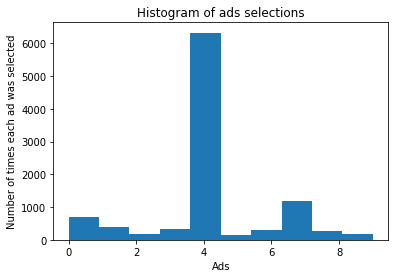

In [23]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### Histogram also shows ad 4 was selected the most